## Importing Libraries

In [1]:
import torch
import torchvision

In [2]:
from torch import nn
import numpy as np
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import confusion_matrix
import pandas as pd

## Getting the Data

In [27]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cpu



In [28]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

In [36]:
train_data= torchvision.datasets.MNIST('mnist_data',train=True, download= False, transform= T)
test_data= torchvision.datasets.MNIST('mnist_data',train=False, download= False, transform= T)

train_dl=torch.utils.data.DataLoader(train_data,shuffle=True,num_workers=4, batch_size= 64)
test_dl=torch.utils.data.DataLoader(test_data, batch_size= 64)

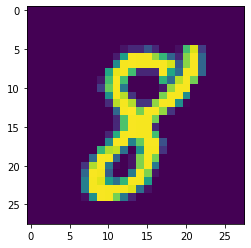

In [37]:
plt.imshow(train_data[97][0][0])

In [38]:
print('No. of samples in train set: '+str(len(train_dl.dataset)))
print('No. of samples in test set: '+str(len(test_dl.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000


## Model Architecture

1. Neural Network

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1= nn.Linear(784,100)
        self.fc2= nn.Linear(100,10)
        self.Sigmoid= nn.Sigmoid()

    def forward(self,x):
        x=self.fc1(x)
        x=self.Sigmoid(x)
        x=self.fc2(x)
        x=F.softmax(x,dim=1)
        print(x.size())
        return x


In [40]:
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (Sigmoid): Sigmoid()
)


In [41]:
params= list(net.parameters())

print('\nDimension of first layer weights:: '+str(params[0].size()))
print('Dimensions of first layer bias:: '+str(params[1].size()))
print('\nDimension of second layer weights:: '+str(params[2].size()))
print('Dimensions of second layer bias:: '+str(params[3].size()))

totalParams=0

for param in params:
    totalParams+=np.sum(np.prod(param.size()))

print('\nTotal Number of Parameters are :: '+str(totalParams))


Dimension of first layer weights:: torch.Size([100, 784])
Dimensions of first layer bias:: torch.Size([100])

Dimension of second layer weights:: torch.Size([10, 100])
Dimensions of second layer bias:: torch.Size([10])

Total Number of Parameters are :: 79510


In [43]:
for i, data in enumerate(train_dl):
    inputs, labels= data
    print(inputs.view(inputs.shape[0],-1).shape)

    #outputs= net(inputs.view(inputs.shape[0]))

)
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Si

In [45]:
inputs.view(-1,inputs.shape[0]).shape

torch.Size([784, 32])

In [46]:
data1= next(iter(train_dl))

In [47]:
input1, label = data1

In [48]:
input1.shape

torch.Size([64, 1, 28, 28])

In [49]:
label

tensor([1, 2, 6, 6, 3, 6, 7, 9, 4, 1, 2, 7, 7, 2, 2, 0, 1, 8, 1, 0, 4, 1, 5, 7,
        7, 5, 4, 8, 8, 6, 3, 4, 1, 8, 1, 1, 9, 0, 9, 5, 4, 4, 3, 3, 4, 9, 8, 8,
        6, 1, 1, 0, 0, 3, 6, 5, 1, 7, 8, 0, 6, 0, 5, 2])

In [51]:
net(input1.view(input1.shape[0],-1))

torch.Size([64, 10])


tensor([[0.0638, 0.1148, 0.1170, 0.0871, 0.1211, 0.1325, 0.1436, 0.0623, 0.0949,
         0.0628],
        [0.0624, 0.1177, 0.1212, 0.0841, 0.1235, 0.1307, 0.1413, 0.0626, 0.0939,
         0.0626],
        [0.0636, 0.1183, 0.1182, 0.0838, 0.1184, 0.1343, 0.1449, 0.0616, 0.0923,
         0.0647],
        [0.0624, 0.1208, 0.1171, 0.0869, 0.1177, 0.1326, 0.1407, 0.0609, 0.0956,
         0.0651],
        [0.0639, 0.1153, 0.1178, 0.0848, 0.1225, 0.1354, 0.1402, 0.0629, 0.0937,
         0.0634],
        [0.0630, 0.1144, 0.1225, 0.0858, 0.1205, 0.1321, 0.1417, 0.0632, 0.0943,
         0.0626],
        [0.0633, 0.1158, 0.1229, 0.0870, 0.1221, 0.1322, 0.1384, 0.0639, 0.0946,
         0.0600],
        [0.0631, 0.1196, 0.1258, 0.0891, 0.1179, 0.1293, 0.1376, 0.0624, 0.0953,
         0.0599],
        [0.0639, 0.1171, 0.1202, 0.0908, 0.1197, 0.1321, 0.1367, 0.0634, 0.0934,
         0.0629],
        [0.0641, 0.1150, 0.1161, 0.0858, 0.1220, 0.1343, 0.1419, 0.0649, 0.0932,
         0.0628],
        [0

## CNN Model Architecture